downloaded netflix data from kaggle
used the following code and choosed from the file chooser

1.loaded the dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv("netflix_titles.csv")

2.importing libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(8,5)

3.initially explored data

In [ ]:
df.head() #first few rows
df.info() #overview of columns,types,null
df.describe()
df.isnull().sum() #counts missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,0
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


4.////data cleaning////
from the above we got to know all the missing values,so we'll clean the data now

In [ ]:
#filling missing values
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df['rating'].fillna('unknown',inplace=True)

#coverting date which are in strings to proper date format
#covert date_added to datetime
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

#extract year from date_added
df['year_added']=df['date_added'].dt.year

#split genres into list
df['genre']=df['listed_in'].str.split(', ')

5.quick snippets

5a. TV shows vs. Movies

In [ ]:
type_counts=df['type'].value_counts()
type_counts


,count
type,
Movie,6131
TV Show,2676


netflix releases more movies than shows

5b.titles added per year

In [ ]:
yearly=df['year_added'].value_counts().sort_index()
yearly

,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,23
2015.0,73
2016.0,418


5c.top 10 genres

In [ ]:
from collections import Counter #counts thing automatically
#loop through sublist in genre column
all_genres=Counter(g for sublist in df['genre'] for g in sublist)
#top 10 genre
top10_genres=all_genres.most_common(10)
pd.DataFrame(top10_genres,columns=['Genre','Count'])

,Genre,Count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


5d.top 10 countries

In [ ]:
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


5e.avg movie duration

In [ ]:
# Step 1: Filter movies
movies = df[df['type'] == 'Movie'].copy()

# Step 2: Drop rows with missing duration values
movies = movies.dropna(subset=['duration'])

# Step 3: Keep only rows that mention 'min' (ignore odd ones like '1 Season')
movies = movies[movies['duration'].str.contains('min')]

# Step 4: Remove ' min' and convert to integer
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)

# Step 5: Calculate average
movies['duration_min'].mean()



np.float64(99.57718668407311)

6. visualizations

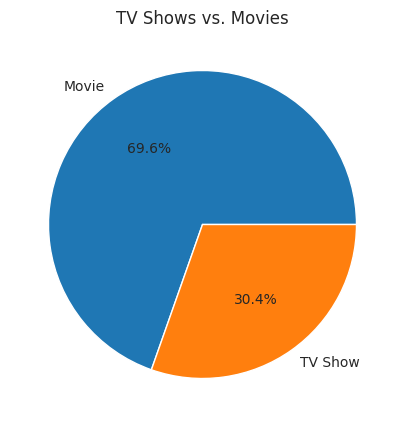

In [ ]:
#1) pie chart: Tv vs.movies
type_counts.plot.pie(autopct='%1.1f%%')
plt.title('TV Shows vs. Movies')
plt.ylabel("")
plt.show()



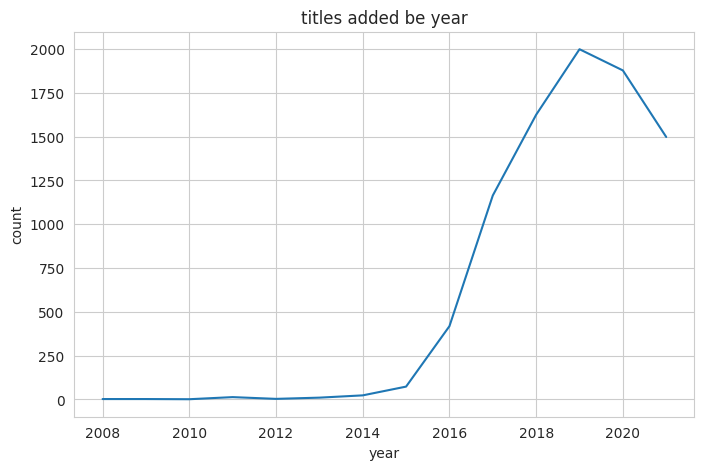

In [ ]:
#2) line plot: titles per year
yearly.plot(kind='line')
plt.title('titles added be year')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

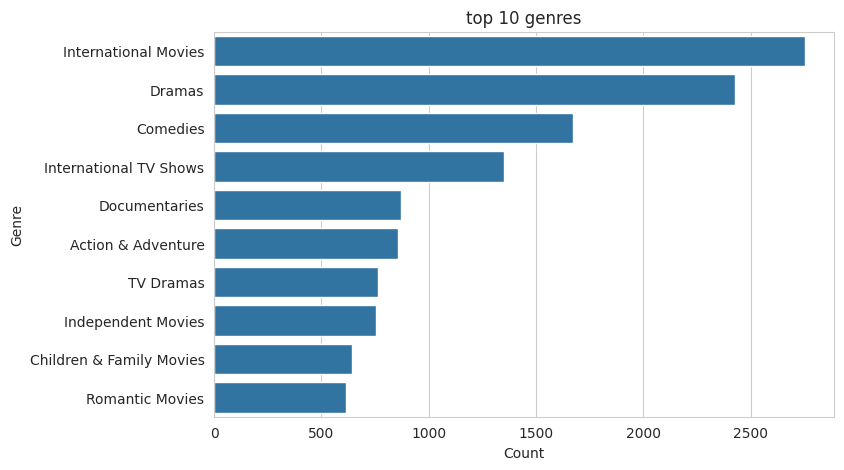

In [ ]:
#3) bar plot:top  10 genre
genres_df=pd.DataFrame(top10_genres,columns=['Genre','Count'])
sns.barplot(x='Count',y='Genre',data=genres_df)
plt.title('top 10 genres')
plt.show()

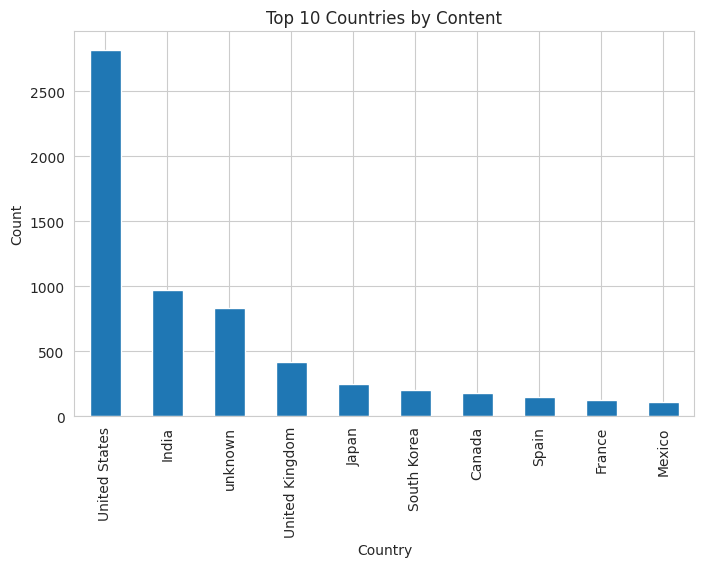

In [ ]:
#4)bar plot: top 10 countries
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()



---
analysed a dataset of Netflix content (movies and TV shows) to find useful patterns, trends, and insights using Python and basic data science tools.


**Insights:**
Movies vs. Shows: Movies make up ~70% of titles—Netflix leans heavily on film content.

Peak Years: 2019 and 2020 saw the highest additions, likely due to production ramp‑up.

Genre Focus: International movies and Drama top the genre list, showing Netflix’s storytelling emphasis.

Global Footprint: USA, India, and UK produce the most content—reflecting core markets.

